In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [19]:
%pip install haversine

  Using cached haversine-2.8.0-py2.py3-none-any.whl (7.7 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\CiSTUP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
from haversine import haversine_vector,Unit

In [63]:
dataset = pd.read_csv(r'../Datasets/BMTC/BMTC/GPS.csv')

In [68]:
dataset.head()

,DEVICE_ID,IST_DATE,LAT,LONGITUDE,time,next_time,next_lat,next_long
2916,150211826,2019-10-13 00:00:03,13.043971,77.594109,2019-10-13 00:00:03,2019-10-13 00:00:13,13.043971,77.594109
4050,150211826,2019-10-13 00:00:13,13.043971,77.594109,2019-10-13 00:00:13,2019-10-13 00:00:23,13.043971,77.594109
5156,150211826,2019-10-13 00:00:23,13.043971,77.594109,2019-10-13 00:00:23,2019-10-13 00:00:33,13.043971,77.594109
6241,150211826,2019-10-13 00:00:33,13.043971,77.594109,2019-10-13 00:00:33,2019-10-13 00:00:43,13.043971,77.594109
7208,150211826,2019-10-13 00:00:43,13.043971,77.594109,2019-10-13 00:00:43,2019-10-13 00:00:53,13.043971,77.594109


In [67]:
# group by device id and find spped using distance and time of next gps ping also sort by time
dataset['time'] = pd.to_datetime(dataset['IST_DATE'])
# take points only on year 2019
dataset = dataset[dataset['time'].dt.year == 2019]
dataset = dataset.sort_values(['DEVICE_ID', 'time'])
dataset['next_time'] = dataset.groupby('DEVICE_ID')['time'].shift(-1)
dataset['next_lat'] = dataset.groupby('DEVICE_ID')['LAT'].shift(-1)
dataset['next_long'] = dataset.groupby('DEVICE_ID')['LONGITUDE'].shift(-1)


In [69]:
dataset = dataset.dropna()

In [70]:
dataset.shape

(28241479, 8)

In [71]:
# IF POINTS LAT  LONGITUDE , next_lat next_long ARE not in range -90 to 90 and -180 to 180 then drop that row
dataset = dataset[(dataset['LAT'] >= -90) & (dataset['LAT'] <= 90)]
dataset = dataset[(dataset['LONGITUDE'] >= -180) & (dataset['LONGITUDE'] <= 180)]
dataset = dataset[(dataset['next_lat'] >= -90) & (dataset['next_lat'] <= 90)]
dataset = dataset[(dataset['next_long'] >= -180) & (dataset['next_long'] <= 180)]


In [ ]:
# calculate haversine distance between two gps pings
# def haversine(row):
#     if row['LAT'] < -90 or row['LAT'] > 90 or row['next_lat'] < -90 or row['next_lat'] > 90:
#         return np.nan
#     else:
#         return haversine_vector((row['LAT'], row['LONGITUDE']), (row['next_lat'], row['next_long']))
# dataset['distance'] = dataset.apply(lambda row: haversine(row), axis=1)


In [72]:
dataset['distance'] = haversine_vector((dataset.loc[:,['LAT','LONGITUDE']]), (dataset.loc[:,['next_lat','next_long']]),Unit.METERS)

In [38]:
dataset.loc[:,['LAT','LONGITUDE']]

,LAT,LONGITUDE
2916,13.043971,77.594109
4050,13.043971,77.594109
5156,13.043971,77.594109
6241,13.043971,77.594109
7208,13.043971,77.594109
...,...,...
21244630,13.110533,77.579080
21248541,13.110342,77.579011
21252479,13.110347,77.579041
21256406,13.110364,77.579034


In [74]:
dataset.distance.describe()

count    2.811244e+07
mean     2.734463e+01
std      4.832258e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.895602e+01
max      9.999322e+02
Name: distance, dtype: float64

In [73]:
dataset = dataset[dataset['distance'] < 1000]

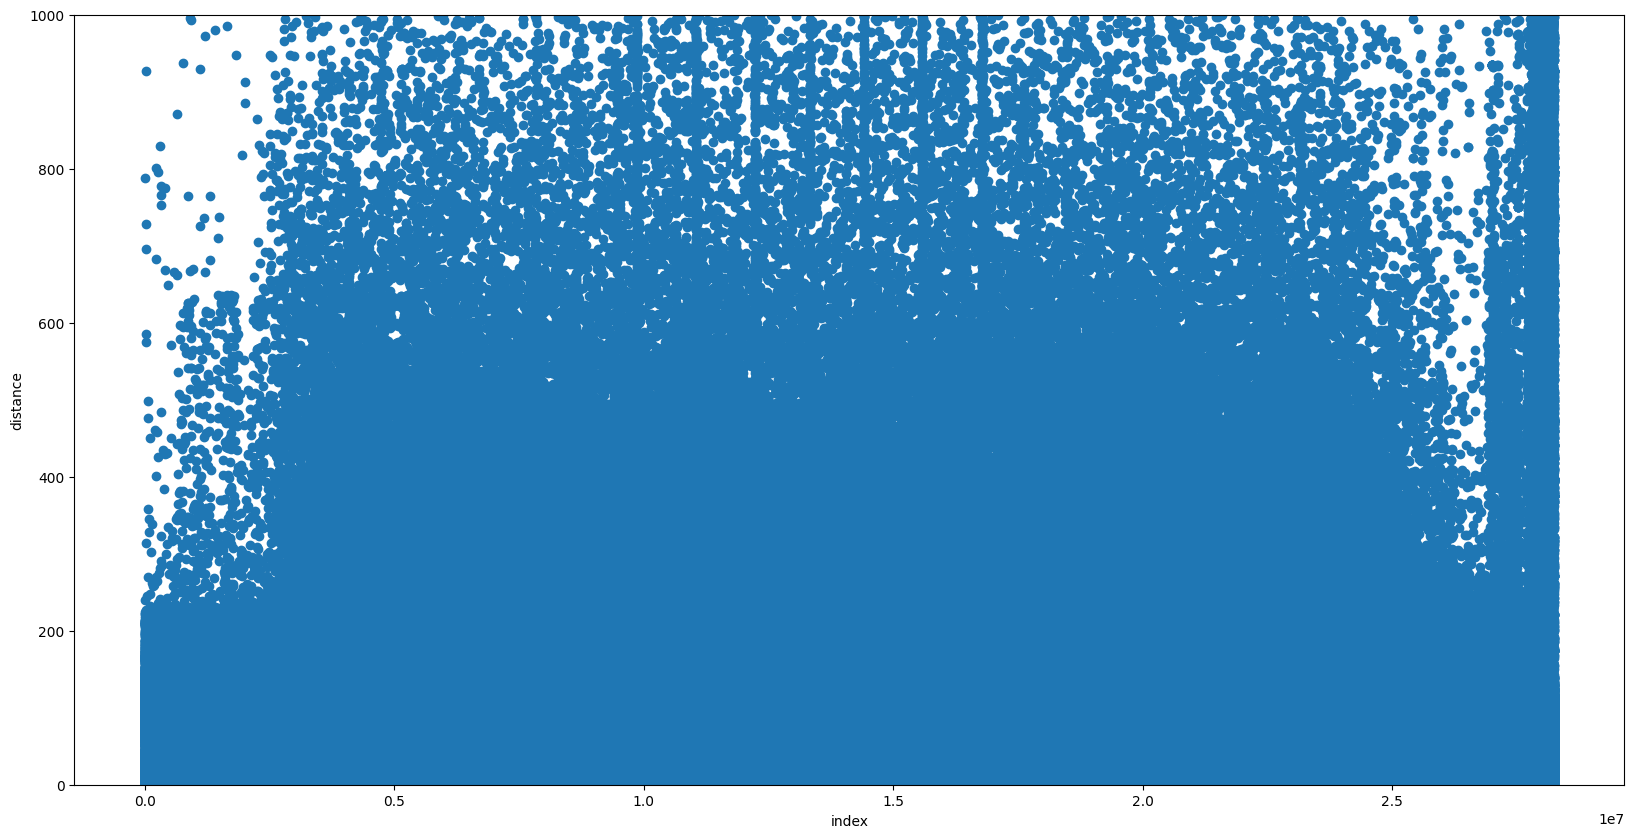

In [75]:
# scatter plot of distance
plt.figure(figsize=(20,10))
plt.scatter(dataset.index,dataset.distance)
plt.ylim(0,1000)
plt.xlabel('index')
plt.ylabel('distance')
plt.show()


In [43]:
dataset.head()

,DEVICE_ID,IST_DATE,LAT,LONGITUDE,time,next_time,next_lat,next_long,distance
2916,150211826,2019-10-13 00:00:03,13.043971,77.594109,2019-10-13 00:00:03,2019-10-13 00:00:13,13.043971,77.594109,0.0
4050,150211826,2019-10-13 00:00:13,13.043971,77.594109,2019-10-13 00:00:13,2019-10-13 00:00:23,13.043971,77.594109,0.0
5156,150211826,2019-10-13 00:00:23,13.043971,77.594109,2019-10-13 00:00:23,2019-10-13 00:00:33,13.043971,77.594109,0.0
6241,150211826,2019-10-13 00:00:33,13.043971,77.594109,2019-10-13 00:00:33,2019-10-13 00:00:43,13.043971,77.594109,0.0
7208,150211826,2019-10-13 00:00:43,13.043971,77.594109,2019-10-13 00:00:43,2019-10-13 00:00:53,13.043971,77.594109,0.0


In [76]:
dataset['time_diff'] = dataset['next_time'] - dataset['time']

In [77]:
dataset.sort_values('time_diff',ascending=False).head()

,DEVICE_ID,IST_DATE,LAT,LONGITUDE,time,next_time,next_lat,next_long,distance,time_diff
12068334,181221679,2019-10-13 02:20:57,12.904628,77.473518,2019-10-13 02:20:57,2019-10-13 22:43:59,12.903820,77.472984,106.874525,0 days 20:23:02
1789792,150811404,2019-10-13 03:05:25,12.941077,77.624840,2019-10-13 03:05:25,2019-10-13 19:46:57,12.937280,77.626808,473.017713,0 days 16:41:32
26926186,150219380,2019-10-13 05:13:01,12.959245,77.527458,2019-10-13 05:13:01,2019-10-13 21:48:04,12.959161,77.527390,11.897070,0 days 16:35:03
516594,150219124,2019-10-13 00:49:34,12.925896,77.554405,2019-10-13 00:49:34,2019-10-13 16:50:12,12.924725,77.554146,133.200648,0 days 16:00:38
1722096,150222955,2019-10-13 02:57:30,13.018881,77.555084,2019-10-13 02:57:30,2019-10-13 18:56:33,13.018031,77.556732,202.013872,0 days 15:59:03


In [78]:
dataset.value_counts('time_diff')

time_diff
0 days 00:00:10    22089767
0 days 00:00:09     1942999
0 days 00:00:00     1802114
0 days 00:01:00      693410
0 days 00:00:11      650493
                     ...   
0 days 00:46:11           1
0 days 00:46:05           1
0 days 00:45:50           1
0 days 00:45:49           1
0 days 20:23:02           1
Name: count, Length: 2946, dtype: int64

In [80]:
# drop rows where time difference is greater than 1 hour and less than 1 second
dataset = dataset[dataset['time_diff'] < pd.Timedelta(hours=1)]
dataset = dataset[dataset['time_diff'] > pd.Timedelta(seconds=1)]

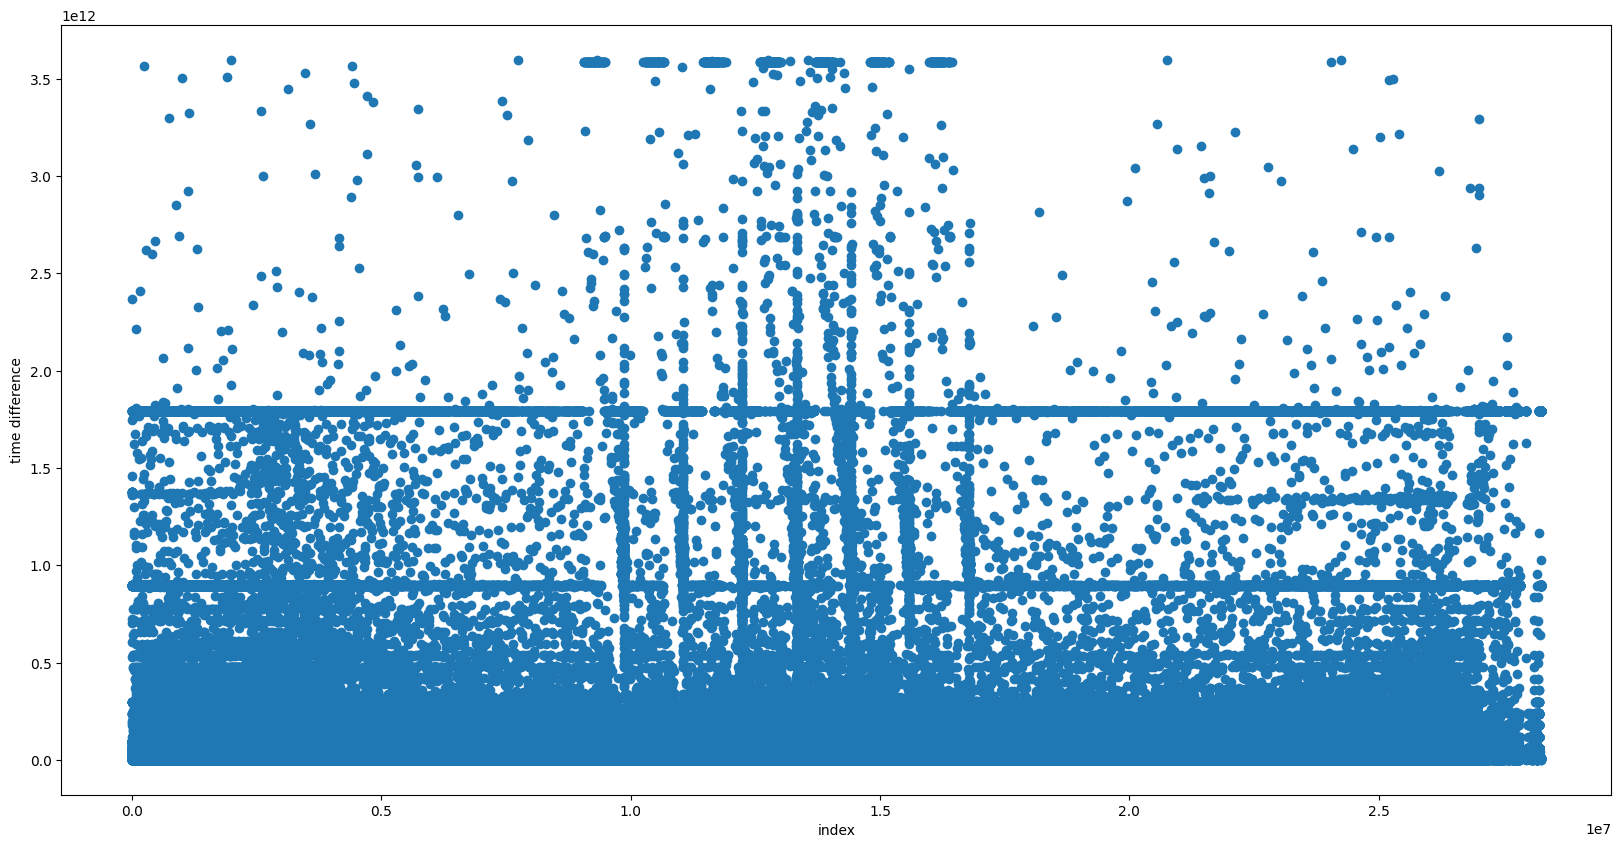

In [81]:
plt.figure(figsize=(20,10))
plt.scatter(dataset.index,dataset.time_diff)
plt.xlabel('index')
plt.ylabel('time difference')
plt.show()